# Лабораторная 3 Нейронные сети
### Фазылова Алика 5140201/30301

# Задание 1

Попробуйте другие архитектуры нейронных сетей для бинарной классификации на
 наборе данных из примера. Попробуйте изменить количество слоев, количество
 нейронов и функции активации. Сравните результаты. Оцените время обучения
 моделей.

Для начала воспроизведем пример для Бинарной классификации





In [2]:
 import pandas as pd
 import numpy as np
 import tensorflow as tf
 from tensorflow.keras import layers, losses
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split

скачаем данные и подготовим их.

In [2]:
# сформируем имена колонок
# имена признаков, которые повторяются три раза
features = [
  "radius",
  "texture",
  "perimeter",
  "area",
  "smoothness",
  "compactness",
  "concavity",
  "concave_points",
  "symmetry",
  "fractal_dimension"
 ]
# повторяем имена признаков три раза с разными индексами
# и добавляем имена первых двух колонок с помощью
# контатенации списков оператором `+`
# ["id", "class"] + ["radius-1", "area-1", ...] + ["radius-2", "area-2", ...
names = sum(([f"{f}-{i}" for f in features] for i in range(1, 4)),
            ['id', 'class'])
raw_data = pd.read_csv('/content/wdbc.data', names=names)
# посмотрим на результат
raw_data

,id,class,radius-1,texture-1,perimeter-1,area-1,smoothness-1,compactness-1,concavity-1,concave_points-1,...,radius-3,texture-3,perimeter-3,area-3,smoothness-3,compactness-3,concavity-3,concave_points-3,symmetry-3,fractal_dimension-3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Слегка преобработаем данные
# 1. Уберем колонку id
data = raw_data.drop(["id"], axis=1)
# 2. Закодируем метку числом 0 и 1
data["class"], class_labels = pd.factorize(data["class"])
print("Class labels:", class_labels)
# посмотрим на результат
data

Class labels: Index(['M', 'B'], dtype='object')


,class,radius-1,texture-1,perimeter-1,area-1,smoothness-1,compactness-1,concavity-1,concave_points-1,symmetry-1,...,radius-3,texture-3,perimeter-3,area-3,smoothness-3,compactness-3,concavity-3,concave_points-3,symmetry-3,fractal_dimension-3
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Разделим на обучающую и тестовую выборку
 # используем уже реализованную функцию из sklearn
 # see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selec
from sklearn.model_selection import train_test_split

train_x, test_x = train_test_split(data, test_size=0.2, random_state=2023)
train_y, test_y = train_x.pop("class"), test_x.pop("class")
# посмотрим на результат
train_x

,radius-1,texture-1,perimeter-1,area-1,smoothness-1,compactness-1,concavity-1,concave_points-1,symmetry-1,fractal_dimension-1,...,radius-3,texture-3,perimeter-3,area-3,smoothness-3,compactness-3,concavity-3,concave_points-3,symmetry-3,fractal_dimension-3
272,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,28.19,28.18,195.90,2384.0,0.1272,0.47250,0.58070,0.18410,0.2833,0.08858
404,12.340,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,0.05708,...,13.18,16.85,84.11,533.1,0.1048,0.06744,0.04921,0.04793,0.2298,0.05974
182,15.700,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.05189,0.1618,0.05549,...,20.11,32.82,129.30,1269.0,0.1414,0.35470,0.29020,0.15410,0.3437,0.08631
198,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.38650,0.17080,0.3193,0.09221
405,10.940,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,0.06615,...,12.40,25.58,82.76,472.4,0.1363,0.16440,0.14120,0.07887,0.2251,0.07732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.1234,0.15420,0.12770,0.06560,0.3174,0.08524
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,...,13.10,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408
515,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.1483,0.15740,0.16240,0.08542,0.3060,0.06783
454,12.620,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.15170,0.18870,0.09851,0.3270,0.07330


Теперь создадим нейросеть. Сначала опишем ее структуру.
 1. На вход должны поступать признаки. Их 30 штук.
 2. Нейросеть состоит из нескольких скрытых слоев. Стоит попробовать разное
 количество скрытых слоев с разным количеством нейронов и разными функциями активациями.
 3. Последний слой должен содержать один нейрон. В качестве функции активации
 выберем сигмоид.
 Создадим базовую модель со следующими параметрами:
три скрытых слоя с числом нейронов
[16, 8, 6] ; функции активации — RELU .

In [6]:
# создаем модель keras
base_model = tf.keras.Sequential(
  layers=[
    layers.Dense(16,activation='relu',input_dim=train_x.shape[1]),
    layers.Dense(8, activation='relu'), # так же задаем второй слой
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid') # выходной слой
 ],
 name="breast-cancer-base-model",
)
# посмотрим описание модели
base_model.summary()

Model: "breast-cancer-base-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 693 (2.71 KB)
Trainable params: 693 (2.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Теперь надо выбрать функцию потерь и алгоритм оптимизации.
 В качестве функции потерь можно взять перекрестную энтропию, среднюю
 квадратичную ошибку или среднюю абсолютную ошибку. Тут выберем перекрестную
 энтропию.
 В качестве оптимизатор выберем алгоритм Adam.
 Также можно включить метрики, которые мы хотим отслеживать в процессе обучения.
 Для примера будем отслеживать точность.
 Метод compile сбросит текущие веса, построит граф вычислений, после чего
 модель будет готова к обучению.


In [7]:
base_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

 Теперь запустим обучение модели. Для обучения нужно выбрать количество эпох,
 размер пакета для градиентного спуска.
 Также добавим тестовую выборку для отслеживания качества работы модели.
 Также измерим время обучения модели. Для этого вставим директиву %%time в
 начало ячейки.

In [8]:
%%time
base_model_history = base_model.fit(
    train_x, train_y,
    epochs=40,
    batch_size=20,
    validation_data=(test_x, test_y))

Epoch 1/40
23/23 [==============================] - 4s 23ms/step - loss: 50.2043 - accuracy: 0.6286 - val_loss: 19.7169 - val_accuracy: 0.6228
Epoch 2/40
23/23 [==============================] - 0s 7ms/step - loss: 7.2882 - accuracy: 0.6330 - val_loss: 0.7833 - val_accuracy: 0.7105
Epoch 3/40
23/23 [==============================] - 0s 7ms/step - loss: 0.7941 - accuracy: 0.7363 - val_loss: 0.6988 - val_accuracy: 0.7719
Epoch 4/40
23/23 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.7209 - val_loss: 0.6511 - val_accuracy: 0.7456
Epoch 5/40
23/23 [==============================] - 0s 8ms/step - loss: 0.6562 - accuracy: 0.7758 - val_loss: 0.6510 - val_accuracy: 0.6754
Epoch 6/40
23/23 [==============================] - 0s 8ms/step - loss: 0.6555 - accuracy: 0.7714 - val_loss: 0.6119 - val_accuracy: 0.8070
Epoch 7/40
23/23 [==============================] - 0s 11ms/step - loss: 0.6392 - accuracy: 0.7714 - val_loss: 0.6574 - val_accuracy: 0.6316
Epoch 8/40
23/23

 Теперь можем посмотреть информацию о процессе обучения в объекте, который
 вернула функция fit.
 В его поле history лежат значения функции потерь и собранные метрики за каждую
 эпоху.
 Напишем функцию для визуализации этих значений.

In [3]:
from typing import Dict, List, Tuple

def plot_history(
    history: Dict[str, List[float]],
    title: str = "",
    metric_name: str = 'loss',
    ylim: Tuple[float, float] = None):

    train_values = history[metric_name]
    plt.plot(train_values, label=f'Train {metric_name}')
    try:
        val_values = history['val_' + metric_name]
        plt.plot(val_values, label=f'Validation {metric_name}')
    except KeyError:
        val_values = []
    plt.title(title)
    all_values = train_values + val_values
    ylim = ylim or (0.9 * min(all_values), 1.1 * max(all_values))
    plt.ylim(ylim)

    plt.ylabel(metric_name.capitalize())
    plt.xlabel("Epoch")
    plt.legend(loc='best')
    plt.show()


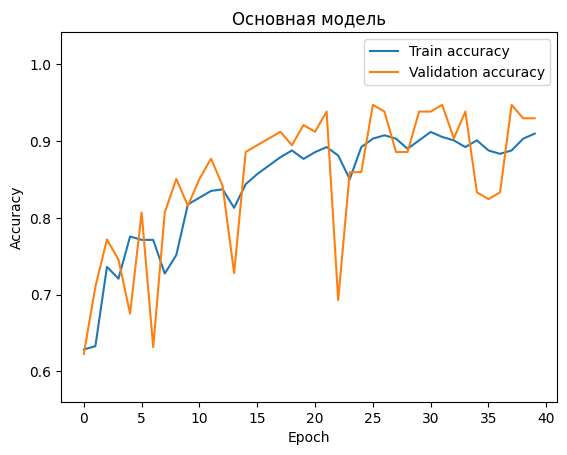

In [10]:
plot_history(base_model_history.history, "Основная модель", "accuracy")

Точность базовой модели 0.9298, время обучения 9.57 s

*Теперь изменим архитектуру базовой модели*

## модель 1 увеличение количество слоев

Увеличим количество слоев добавим слой с 32 и  4 нейронами

Epoch 1/40
23/23 [==============================] - 4s 31ms/step - loss: 8.1729 - accuracy: 0.6286 - val_loss: 1.8731 - val_accuracy: 0.6228
Epoch 2/40
23/23 [==============================] - 0s 12ms/step - loss: 1.1774 - accuracy: 0.5538 - val_loss: 0.6962 - val_accuracy: 0.3772
Epoch 3/40
23/23 [==============================] - 0s 21ms/step - loss: 0.7101 - accuracy: 0.3714 - val_loss: 0.6946 - val_accuracy: 0.3772
Epoch 4/40
23/23 [==============================] - 1s 24ms/step - loss: 0.6864 - accuracy: 0.3714 - val_loss: 0.6855 - val_accuracy: 0.3772
Epoch 5/40
23/23 [==============================] - 0s 15ms/step - loss: 0.6815 - accuracy: 0.3714 - val_loss: 0.6827 - val_accuracy: 0.3772
Epoch 6/40
23/23 [==============================] - 0s 17ms/step - loss: 0.6820 - accuracy: 0.3714 - val_loss: 0.6795 - val_accuracy: 0.3772
Epoch 7/40
23/23 [==============================] - 0s 14ms/step - loss: 0.6762 - accuracy: 0.3714 - val_loss: 0.6766 - val_accuracy: 0.3772
Epoch 8/40
23

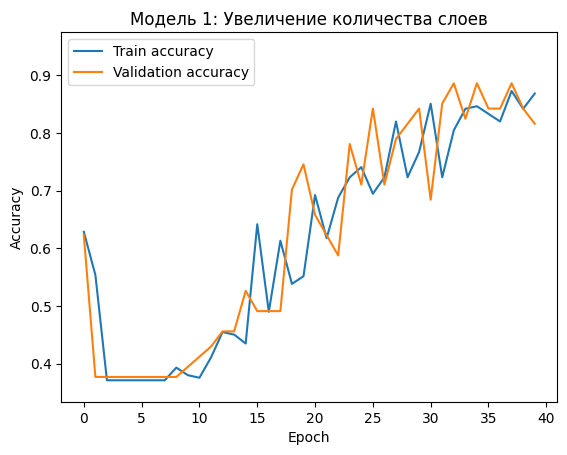

In [11]:
model_1 = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=train_x.shape[1]),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name="model-1")

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%time model_1_history = model_1.fit(train_x, train_y, epochs=40, batch_size=20, validation_data=(test_x, test_y))
plot_history(model_1_history.history, "Модель 1: Увеличение количества слоев", "accuracy")

Точность модели снизилась по сравнению с базовой и составляет 0.8158, время обучения выросло до 11.8 s

## модель 2 уменьшение количества нейронов

изменим количество нейронов

Epoch 1/40
23/23 [==============================] - 2s 19ms/step - loss: 194.0718 - accuracy: 0.6286 - val_loss: 125.2642 - val_accuracy: 0.6228
Epoch 2/40
23/23 [==============================] - 0s 8ms/step - loss: 94.0060 - accuracy: 0.6286 - val_loss: 44.3224 - val_accuracy: 0.6228
Epoch 3/40
23/23 [==============================] - 0s 8ms/step - loss: 28.3690 - accuracy: 0.6286 - val_loss: 14.0884 - val_accuracy: 0.6228
Epoch 4/40
23/23 [==============================] - 0s 7ms/step - loss: 9.3770 - accuracy: 0.6286 - val_loss: 3.9725 - val_accuracy: 0.6228
Epoch 5/40
23/23 [==============================] - 0s 8ms/step - loss: 1.7786 - accuracy: 0.4967 - val_loss: 1.3187 - val_accuracy: 0.3772
Epoch 6/40
23/23 [==============================] - 0s 9ms/step - loss: 0.9785 - accuracy: 0.3473 - val_loss: 0.7435 - val_accuracy: 0.3246
Epoch 7/40
23/23 [==============================] - 0s 8ms/step - loss: 0.7581 - accuracy: 0.3516 - val_loss: 0.7552 - val_accuracy: 0.2018
Epoch 8/40


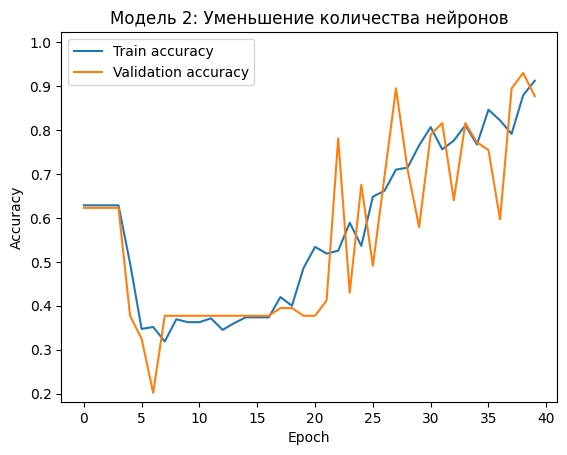

In [12]:
model_2 = tf.keras.Sequential([
    layers.Dense(10, activation='relu', input_dim=train_x.shape[1]),
    layers.Dense(5, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name="model-2")

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%time model_2_history = model_2.fit(train_x, train_y, epochs=40, batch_size=20, validation_data=(test_x, test_y))
plot_history(model_2_history.history, "Модель 2: Уменьшение количества нейронов", "accuracy")


Точность модели 0.8772, это немного ниже базовой.Время обучения 11 сек

## модель 3 функция активации тангенс

изменим функции активации на тангенс за архитектуру взяв 1ю модель

Epoch 1/40
23/23 [==============================] - 3s 17ms/step - loss: 0.6102 - accuracy: 0.7275 - val_loss: 0.5126 - val_accuracy: 0.8596
Epoch 2/40
23/23 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.8659 - val_loss: 0.4215 - val_accuracy: 0.9211
Epoch 3/40
23/23 [==============================] - 0s 6ms/step - loss: 0.4213 - accuracy: 0.8835 - val_loss: 0.3833 - val_accuracy: 0.9386
Epoch 4/40
23/23 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.9077 - val_loss: 0.3257 - val_accuracy: 0.9386
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 0.3640 - accuracy: 0.8879 - val_loss: 0.3405 - val_accuracy: 0.8684
Epoch 6/40
23/23 [==============================] - 0s 6ms/step - loss: 0.3362 - accuracy: 0.9011 - val_loss: 0.2830 - val_accuracy: 0.9474
Epoch 7/40
23/23 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.9099 - val_loss: 0.2898 - val_accuracy: 0.9386
Epoch 8/40
23/23 [=

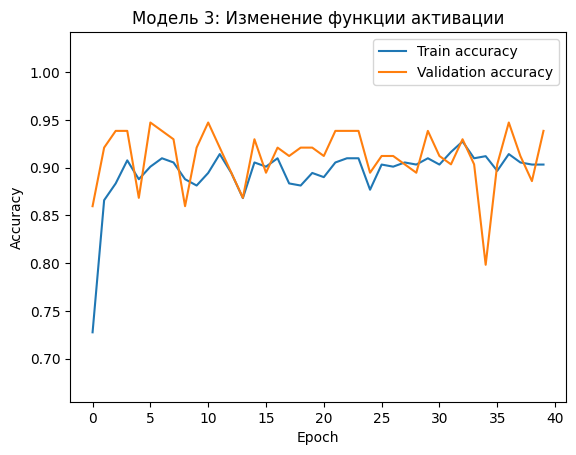

In [13]:
model_3 = tf.keras.Sequential([
    layers.Dense(32, activation='tanh', input_dim=train_x.shape[1]),
    layers.Dense(16, activation='tanh'),
    layers.Dense(8, activation='tanh'),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
], name="model-3")

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%time model_3_history = model_3.fit(train_x, train_y, epochs=40, batch_size=20, validation_data=(test_x, test_y))
plot_history(model_3_history.history, "Модель 3: Изменение функции активации", "accuracy")

точность 0.9386,  выше чем у базовой модели. Время обучения 7,86 меньше чем у базовой

В результате лучшей моделью оказалась 3 я модель с функцией активацией тангес и углубленной архитектурой

# Задание 2

 Постройте нейронную сеть для бинарной классификации для набора данных о
 сердечной недостаточности. Сравните эффективность нейросетей с различными
 параметрами.

In [14]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
heart_failure_clinical_records = pd.read_csv(url)

X = heart_failure_clinical_records.drop(columns=["DEATH_EVENT"])
Y = heart_failure_clinical_records["DEATH_EVENT"]

X.head(5)
Y.head(5)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



## Базовая модель

Epoch 1/40
23/23 [==============================] - 2s 13ms/step - loss: 42.3680 - accuracy: 0.3714 - val_loss: 23.7641 - val_accuracy: 0.3772
Epoch 2/40
23/23 [==============================] - 0s 5ms/step - loss: 10.6753 - accuracy: 0.4703 - val_loss: 0.3557 - val_accuracy: 0.9035
Epoch 3/40
23/23 [==============================] - 0s 6ms/step - loss: 0.8669 - accuracy: 0.8593 - val_loss: 0.3122 - val_accuracy: 0.9035
Epoch 4/40
23/23 [==============================] - 0s 6ms/step - loss: 0.3776 - accuracy: 0.8967 - val_loss: 0.2466 - val_accuracy: 0.9123
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.9033 - val_loss: 0.2126 - val_accuracy: 0.9298
Epoch 6/40
23/23 [==============================] - 0s 5ms/step - loss: 0.2717 - accuracy: 0.9055 - val_loss: 0.2061 - val_accuracy: 0.9211
Epoch 7/40
23/23 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.9187 - val_loss: 0.2087 - val_accuracy: 0.9211
Epoch 8/40
23/23

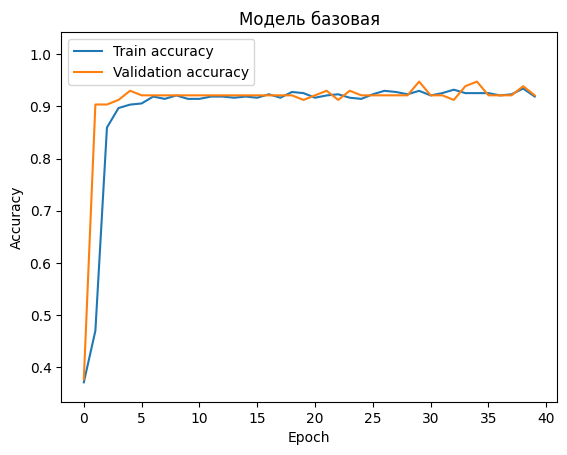

In [15]:
# Базовая модель
base_model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_dim=train_x.shape[1]),
    layers.Dense(8, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name="base_model")

base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%time base_model_history = base_model.fit(train_x, train_y, epochs=40, batch_size=20, validation_data=(test_x, test_y))

plot_history(base_model_history.history, "Модель базовая", "accuracy")

Точность базовой модели 0.9211, время обучения 11.3 s

## 1 модель (Увеличение количества слоев)

Epoch 1/40
23/23 [==============================] - 2s 14ms/step - loss: 8.3634 - accuracy: 0.5275 - val_loss: 0.6709 - val_accuracy: 0.3772
Epoch 2/40
23/23 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.3714 - val_loss: 0.6921 - val_accuracy: 0.3772
Epoch 3/40
23/23 [==============================] - 0s 6ms/step - loss: 0.6084 - accuracy: 0.5363 - val_loss: 0.5490 - val_accuracy: 0.7807
Epoch 4/40
23/23 [==============================] - 0s 5ms/step - loss: 0.5508 - accuracy: 0.8066 - val_loss: 0.5328 - val_accuracy: 0.8158
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 0.5372 - accuracy: 0.8264 - val_loss: 0.5268 - val_accuracy: 0.9211
Epoch 6/40
23/23 [==============================] - 0s 6ms/step - loss: 0.5242 - accuracy: 0.8593 - val_loss: 0.5280 - val_accuracy: 0.7193
Epoch 7/40
23/23 [==============================] - 0s 6ms/step - loss: 0.5174 - accuracy: 0.8462 - val_loss: 0.4974 - val_accuracy: 0.8860
Epoch 8/40
23/23 [=

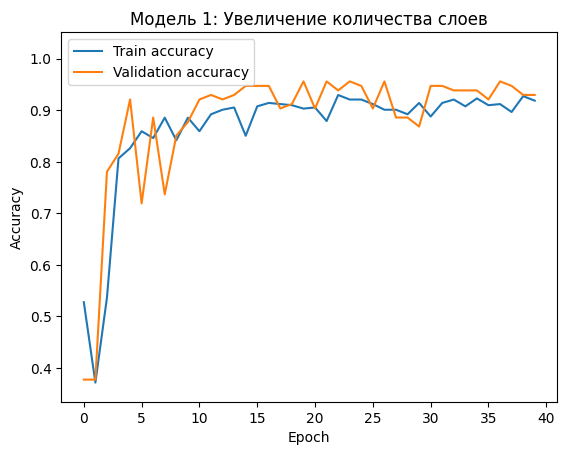

In [16]:
model_1 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=train_x.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name="model_1")

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%time model_1_history = model_1.fit(train_x, train_y, epochs=40, batch_size=20, validation_data=(test_x, test_y))

plot_history(model_1_history.history, "Модель 1: Увеличение количества слоев", "accuracy")


Точность первой модели 0.9298, время обучения 11.2 s.Показатели почти как у базовой модели

## 2 модель (увеличение количества нейронов)



увеличим количество нейронов в слоях

Epoch 1/40
23/23 [==============================] - 2s 20ms/step - loss: 36.7896 - accuracy: 0.4813 - val_loss: 3.9194 - val_accuracy: 0.6228
Epoch 2/40
23/23 [==============================] - 0s 8ms/step - loss: 1.1887 - accuracy: 0.7077 - val_loss: 0.2365 - val_accuracy: 0.9035
Epoch 3/40
23/23 [==============================] - 0s 10ms/step - loss: 0.3058 - accuracy: 0.8945 - val_loss: 0.2174 - val_accuracy: 0.9386
Epoch 4/40
23/23 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.8901 - val_loss: 0.3332 - val_accuracy: 0.8158
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 0.3191 - accuracy: 0.8813 - val_loss: 0.2637 - val_accuracy: 0.8860
Epoch 6/40
23/23 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.8989 - val_loss: 0.3965 - val_accuracy: 0.7982
Epoch 7/40
23/23 [==============================] - 0s 6ms/step - loss: 0.2720 - accuracy: 0.9055 - val_loss: 0.1938 - val_accuracy: 0.9211
Epoch 8/40
23/23 

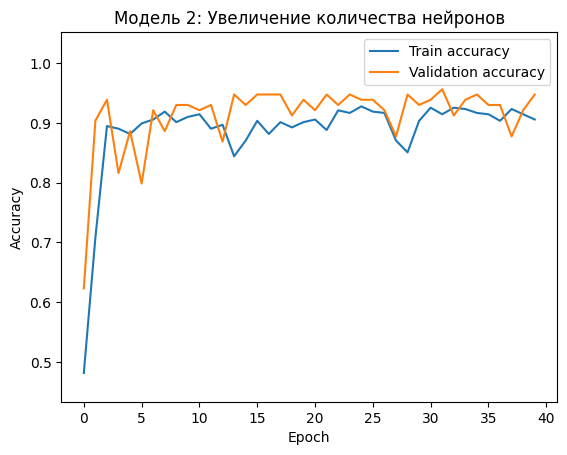

In [17]:
model_2 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=train_x.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name="model-2")

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%time model_2_history = model_2.fit(train_x, train_y, epochs=40, batch_size=20, validation_data=(test_x, test_y))
plot_history(model_2_history.history, "Модель 2: Увеличение количества нейронов", "accuracy")

Точность второй модели 0.9474, время обучения 7.64 s. Точность выше базовой а обучение быстрее.

## 3 модель (изменение функции активации)

в базовой модели заменим функции активации с relu на leaky_relu

Epoch 1/40
23/23 [==============================] - 2s 14ms/step - loss: 2.0835 - accuracy: 0.6308 - val_loss: 0.7716 - val_accuracy: 0.6316
Epoch 2/40
23/23 [==============================] - 0s 5ms/step - loss: 0.8301 - accuracy: 0.7956 - val_loss: 0.5225 - val_accuracy: 0.7895
Epoch 3/40
23/23 [==============================] - 0s 6ms/step - loss: 0.7134 - accuracy: 0.8264 - val_loss: 0.4220 - val_accuracy: 0.8246
Epoch 4/40
23/23 [==============================] - 0s 6ms/step - loss: 0.6433 - accuracy: 0.8418 - val_loss: 0.5697 - val_accuracy: 0.7105
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 0.5828 - accuracy: 0.8418 - val_loss: 0.3163 - val_accuracy: 0.8947
Epoch 6/40
23/23 [==============================] - 0s 6ms/step - loss: 0.5095 - accuracy: 0.8659 - val_loss: 0.2755 - val_accuracy: 0.9035
Epoch 7/40
23/23 [==============================] - 0s 5ms/step - loss: 0.4216 - accuracy: 0.8747 - val_loss: 0.2851 - val_accuracy: 0.9123
Epoch 8/40
23/23 [=

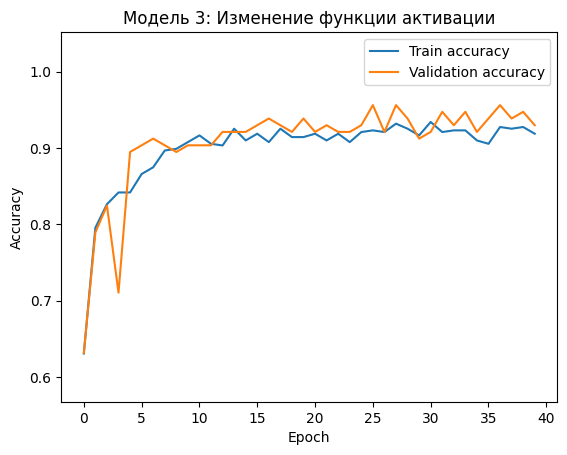

In [18]:
model_3 = tf.keras.Sequential([
    layers.Dense(16, activation='leaky_relu', input_dim=train_x.shape[1]),
    layers.Dense(8, activation='leaky_relu'),
    layers.Dense(6, activation='leaky_relu'),
    layers.Dense(1, activation='sigmoid')
], name="model-3")

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%time model_3_history = model_3.fit(train_x, train_y, epochs=40, batch_size=20, validation_data=(test_x, test_y))
plot_history(model_3_history.history, "Модель 3: Изменение функции активации", "accuracy")

Точность третьей модели 0.9298, время обучения 8.7 s. По точности модель схожа с базовой, по скорости обучается быстрее

Результаты:

Точность базовой модели 0.9211, время обучения 11.3 s

Точность первой модели 0.9298, время обучения 11.2 s

Точность второй модели 0.9474, время обучения 7.64 s

Точность третьей модели 0.9298, время обучения 8.7 s

Лучшей оказалась вторая модель с увеличинным количеством рейронов в слоях

# Задание 3

Попробуйте другие архитектуры нейронных сетей для многоклассовой
 классификации на наборе данных из примера. Попробуйте изменить количество
 слоев, количество нейронов и функции активации. Сравните результаты. Оцените
 время обучения моделей.

для начала реализуем пример

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, datasets
import matplotlib.pyplot as plt

In [41]:
# загружаем данные
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

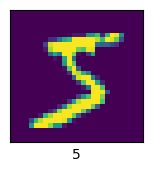

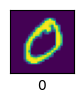

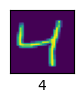

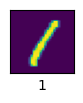

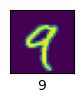

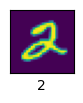

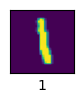

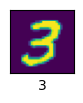

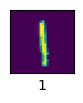

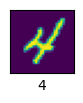

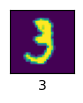

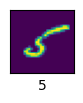

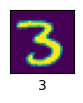

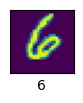

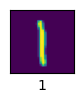

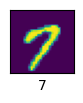

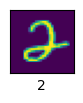

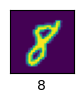

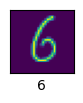

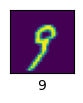

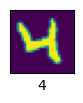

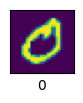

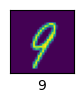

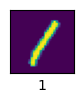

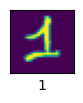

In [22]:
# немного посмотрим на данные
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_x[i])
  plt.xlabel(str(train_y[i]))
  plt.show()

In [23]:
base_model = tf.keras.Sequential([
      layers.Flatten(input_shape=(28, 28, 1)),
      layers.Rescaling(1 / 255),
      layers.Dense(128, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(10),
      layers.Softmax()
    ],
    name="mnist-base-model",
)
# посмотрим описание модели
base_model.summary()

Model: "mnist-base-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 rescaling (Rescaling)       (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 32)                4128      
                                                                 
 dense_38 (Dense)            (None, 10)                330       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 104938 (409.91 KB)
Trainable params:

In [24]:
base_model.compile(
loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [25]:
%%time
base_model_history = base_model.fit(
    train_x, train_y,
    epochs=40,
    batch_size=100,
    validation_data=(test_x, test_y))

Epoch 1/40
600/600 [==============================] - 4s 4ms/step - loss: 0.3351 - accuracy: 0.9040 - val_loss: 0.1654 - val_accuracy: 0.9521
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1384 - accuracy: 0.9595 - val_loss: 0.1158 - val_accuracy: 0.9656
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0956 - accuracy: 0.9711 - val_loss: 0.1002 - val_accuracy: 0.9708
Epoch 4/40
600/600 [==============================] - 3s 5ms/step - loss: 0.0720 - accuracy: 0.9786 - val_loss: 0.0859 - val_accuracy: 0.9748
Epoch 5/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0801 - val_accuracy: 0.9744
Epoch 6/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0770 - val_accuracy: 0.9769
Epoch 7/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.0788 - val_accuracy: 0.9757
Epoch 

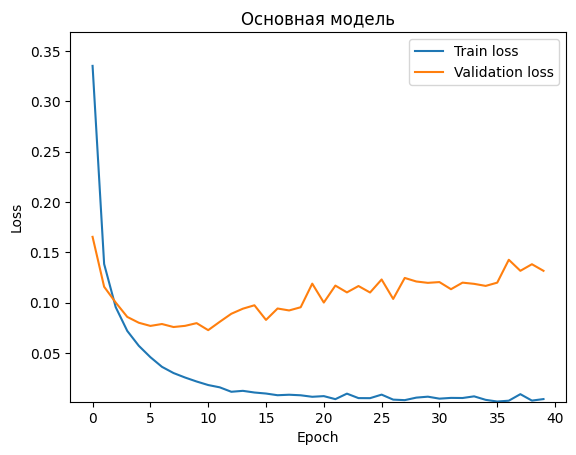

0.9800000190734863

In [26]:
 plot_history(base_model_history.history, "Основная модель")
 base_model_history.history['val_accuracy'][-1]

теперь предоставим изменение примера

## 1 модель (Увеличение количества слоев)

добавим слой с 256 нейронами

In [42]:
model_1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10),
    layers.Softmax()
], name="model_1")

model_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [47]:
%%time
model_1_history = model_1.fit(
    train_x, train_y,
    epochs=40,
    batch_size=100,
    validation_data=(test_x, test_y))

Epoch 1/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1053 - val_accuracy: 0.9833
Epoch 2/40
600/600 [==============================] - 3s 5ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.1103 - val_accuracy: 0.9818
Epoch 3/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.1073 - val_accuracy: 0.9816
Epoch 4/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1130 - val_accuracy: 0.9821
Epoch 5/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1295 - val_accuracy: 0.9805
Epoch 6/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1364 - val_accuracy: 0.9795
Epoch 7/40
600/600 [==============================] - 3s 4ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.1116 - val_accuracy: 0.9811
Epoch 

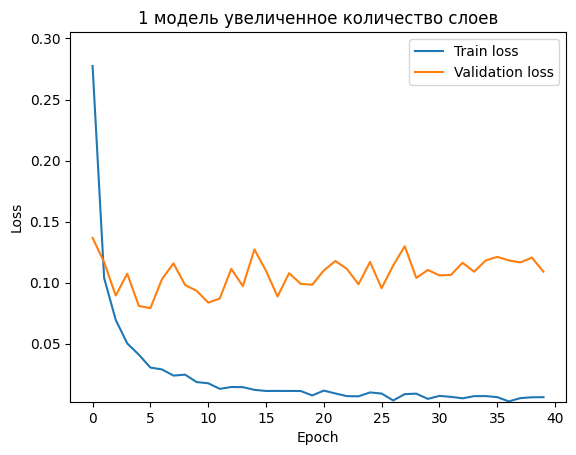

0.9818000197410583

In [44]:
plot_history(model_1_history.history, "1 модель увеличенное количество слоев")
model_1_history.history['val_accuracy'][-1]

точность совсем чуть чуть увеличилась, но время обучения также возросло по сравнению с базовой моделью

## 2 модель (изменение функции активации)

изменим функцию активации на тангенс в базовой модели

In [48]:
model_2 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(10),
    layers.Softmax()
], name="model_2")

model_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [49]:
%%time
model_2_history = model_2.fit(
    train_x, train_y,
    epochs=40,
    batch_size=100,
    validation_data=(test_x, test_y))

Epoch 1/40
600/600 [==============================] - 4s 5ms/step - loss: 0.3358 - accuracy: 0.9109 - val_loss: 0.1770 - val_accuracy: 0.9470
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1449 - accuracy: 0.9574 - val_loss: 0.1255 - val_accuracy: 0.9611
Epoch 3/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0984 - accuracy: 0.9715 - val_loss: 0.1014 - val_accuracy: 0.9690
Epoch 4/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0728 - accuracy: 0.9782 - val_loss: 0.1002 - val_accuracy: 0.9700
Epoch 5/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.0938 - val_accuracy: 0.9725
Epoch 6/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0946 - val_accuracy: 0.9722
Epoch 7/40
600/600 [==============================] - 3s 5ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0824 - val_accuracy: 0.9744
Epoch 

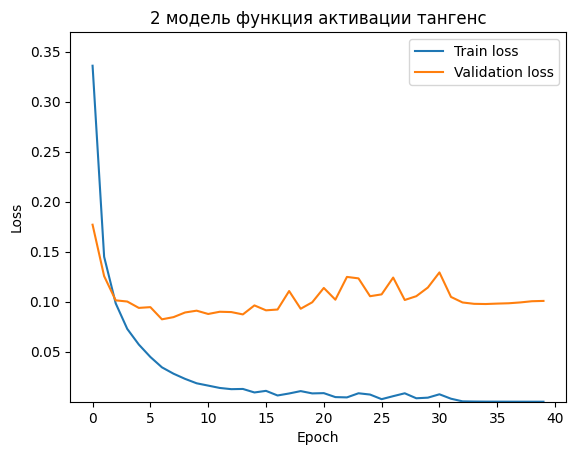

0.9817000031471252

In [50]:
plot_history(model_2_history.history, "2 модель функция активации тангенс")
model_2_history.history['val_accuracy'][-1]

результаты схожи с базовой моделью

## 3 модель увеличение количества нейронов в слоях

увеличим число нейронов в слоях

In [54]:
model_3 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Rescaling(1 / 255),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10),
    layers.Softmax()
], name="model_3")

model_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [55]:
%%time
model_3_history = model_3.fit(
    train_x, train_y,
    epochs=40,
    batch_size=100,
    validation_data=(test_x, test_y))

Epoch 1/40
600/600 [==============================] - 4s 4ms/step - loss: 0.2157 - accuracy: 0.9344 - val_loss: 0.1059 - val_accuracy: 0.9652
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0838 - accuracy: 0.9736 - val_loss: 0.0888 - val_accuracy: 0.9729
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0569 - accuracy: 0.9818 - val_loss: 0.0730 - val_accuracy: 0.9787
Epoch 4/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0847 - val_accuracy: 0.9740
Epoch 5/40
600/600 [==============================] - 3s 5ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0967 - val_accuracy: 0.9745
Epoch 6/40
600/600 [==============================] - 3s 4ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 7/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0793 - val_accuracy: 0.9795
Epoch 

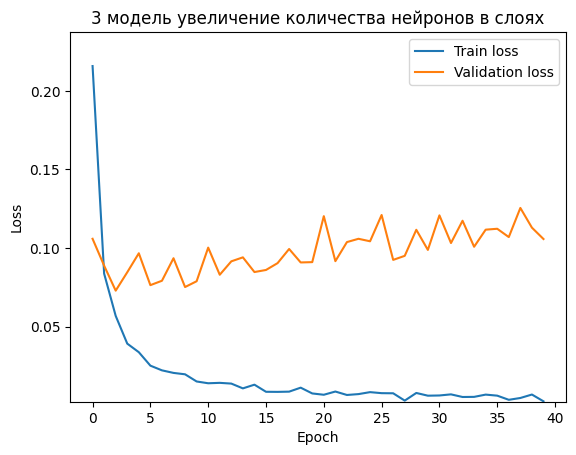

0.9842000007629395

In [56]:
plot_history(model_3_history.history, "3 модель увеличение количества нейронов в слоях")
model_3_history.history['val_accuracy'][-1]

точность немного больше базовой, но в целом результаты схожи с ней, время обучения больше базовой

Результаты:

Точность базовой модели 0.98, время обучения 1 мин 26 сек

Точность первой модели 0.9818, время обучения 2 мин 3 сек

Точность второй модели 0.9817, время обучения 1 мин 33 сек

Точность третьей модели 0.9842, время обучения 1 мин 49 сек

По точности лучшей является третья модель, однако результаты настолько мало отличаются, что усложнять базовую модель особо смысла нет, также во всех моделям можем заметить переобучение

# Задание 4

Постройте нейронную сеть для многоклассовой классификации для набора
 данных Fashion MNIST. Сравните эффективность нейросетей с различными
 параметрами.

In [58]:
# загружаем данные
(train_x, train_y), (test_x, test_y) = datasets.fashion_mnist.load_data()

# нормализация данных
train_x, test_x = train_x / 255.0, test_x / 255.0

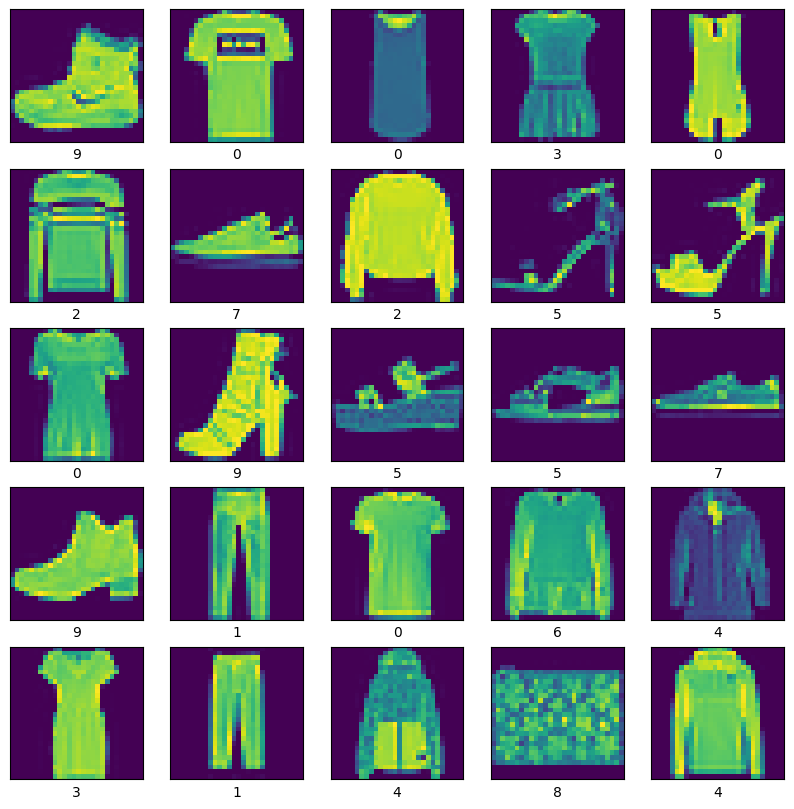

In [59]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])
    plt.xlabel(str(train_y[i]))
plt.show()

In [60]:
# Базовая модель
base_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="fashion-mnist-base-model")


base_model.summary()

base_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "fashion-mnist-base-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 128)               100480    
                                                                 
 dense_58 (Dense)            (None, 32)                4128      
                                                                 
 dense_59 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
%%time
base_model_history = base_model.fit(
    train_x, train_y,
    epochs=20,
    batch_size=100,
    validation_data=(test_x, test_y)
)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.5375 - accuracy: 0.8140 - val_loss: 0.4528 - val_accuracy: 0.8408
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3893 - accuracy: 0.8602 - val_loss: 0.4015 - val_accuracy: 0.8564
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3497 - accuracy: 0.8741 - val_loss: 0.3744 - val_accuracy: 0.8662
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3228 - accuracy: 0.8833 - val_loss: 0.3589 - val_accuracy: 0.8740
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3088 - accuracy: 0.8869 - val_loss: 0.3528 - val_accuracy: 0.8697
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2973 - accuracy: 0.8915 - val_loss: 0.3450 - val_accuracy: 0.8752
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2799 - accuracy: 0.8979 - val_loss: 0.3406 - val_accuracy: 0.8754
Epoch 

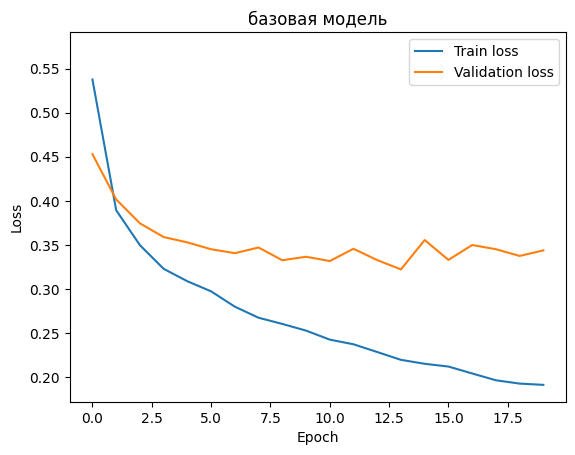

0.8885999917984009

In [62]:
plot_history(base_model_history.history, "базовая модель")
base_model_history.history['val_accuracy'][-1]

## 1 модель увеличение количества слоев

In [63]:
model_1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="fashion-mnist-model-1")

model_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [64]:
%%time
model_1_history = model_1.fit(
    train_x, train_y,
    epochs=20,
    batch_size=100,
    validation_data=(test_x, test_y)
)

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.5264 - accuracy: 0.8130 - val_loss: 0.4458 - val_accuracy: 0.8406
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3755 - accuracy: 0.8625 - val_loss: 0.3730 - val_accuracy: 0.8664
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3330 - accuracy: 0.8775 - val_loss: 0.3549 - val_accuracy: 0.8760
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3097 - accuracy: 0.8849 - val_loss: 0.3400 - val_accuracy: 0.8787
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2917 - accuracy: 0.8903 - val_loss: 0.3495 - val_accuracy: 0.8726
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2773 - accuracy: 0.8952 - val_loss: 0.3472 - val_accuracy: 0.8754
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2636 - accuracy: 0.9011 - val_loss: 0.3260 - val_accuracy: 0.8829
Epoch 

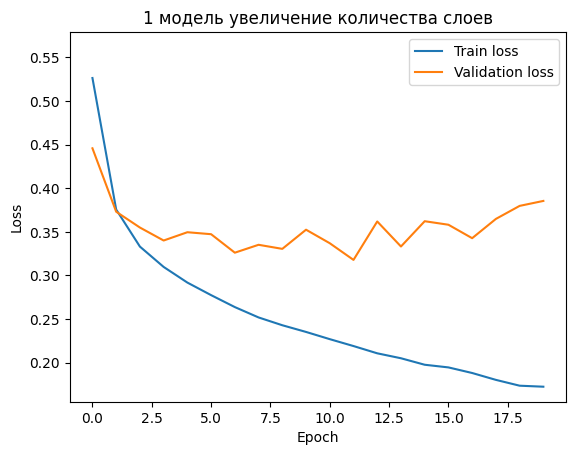

0.885699987411499

In [65]:
plot_history(model_1_history.history, "1 модель увеличение количества слоев")
model_1_history.history['val_accuracy'][-1]

точность снизилась по сравнению с базовой а время обучения увеличилось

## 2 модель Изменение функции активации на elu

In [66]:
model_2 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(32, activation='elu'),
    layers.Dense(10, activation='softmax')
], name="fashion-mnist-model-2")

model_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [67]:
%%time
model_2_history = model_2.fit(
    train_x, train_y,
    epochs=20,
    batch_size=100,
    validation_data=(test_x, test_y)
)

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.5225 - accuracy: 0.8130 - val_loss: 0.4342 - val_accuracy: 0.8458
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3825 - accuracy: 0.8616 - val_loss: 0.4087 - val_accuracy: 0.8505
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3432 - accuracy: 0.8736 - val_loss: 0.3939 - val_accuracy: 0.8590
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3213 - accuracy: 0.8829 - val_loss: 0.3642 - val_accuracy: 0.8710
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3033 - accuracy: 0.8881 - val_loss: 0.3719 - val_accuracy: 0.8654
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2878 - accuracy: 0.8926 - val_loss: 0.3455 - val_accuracy: 0.8722
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2767 - accuracy: 0.8958 - val_loss: 0.3379 - val_accuracy: 0.8782
Epoch 

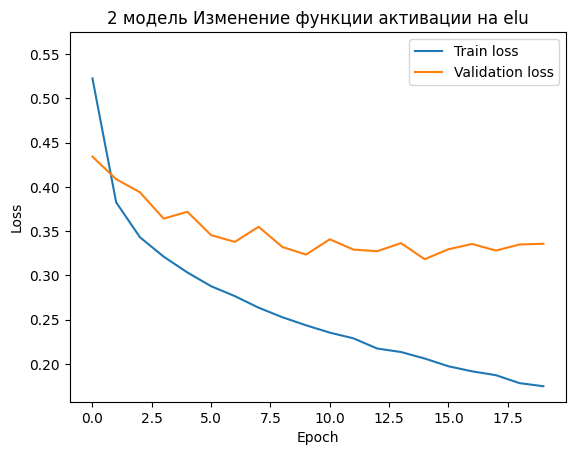

0.8888000249862671

In [68]:
plot_history(model_2_history.history, "2 модель Изменение функции активации на elu")
model_2_history.history['val_accuracy'][-1]

точность такая же как и у базовой, время обучения увеличилось

## 3 модель  увеличение количества нейронов

In [69]:
model_3 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="fashion-mnist-model-3")

model_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [70]:
%%time
model_3_history = model_3.fit(
    train_x, train_y,
    epochs=20,
    batch_size=100,
    validation_data=(test_x, test_y)
)

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.4804 - accuracy: 0.8278 - val_loss: 0.4006 - val_accuracy: 0.8534
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3562 - accuracy: 0.8709 - val_loss: 0.3789 - val_accuracy: 0.8622
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3216 - accuracy: 0.8814 - val_loss: 0.3384 - val_accuracy: 0.8772
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2956 - accuracy: 0.8903 - val_loss: 0.3502 - val_accuracy: 0.8766
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2802 - accuracy: 0.8949 - val_loss: 0.3295 - val_accuracy: 0.8808
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2633 - accuracy: 0.9010 - val_loss: 0.3542 - val_accuracy: 0.8718
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2517 - accuracy: 0.9047 - val_loss: 0.3412 - val_accuracy: 0.8767
Epoch 

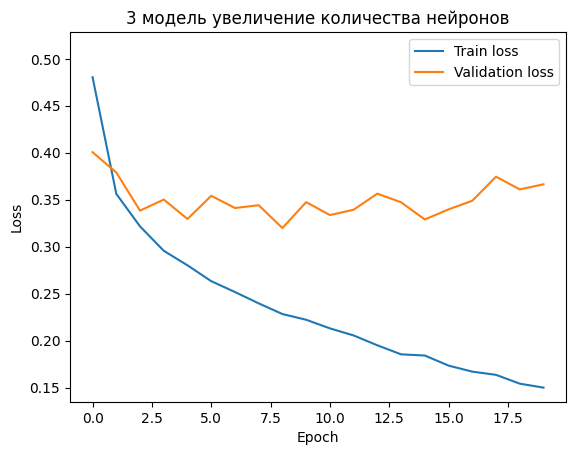

0.8986999988555908

In [71]:
plot_history(model_3_history.history, "3 модель увеличение количества нейронов")
model_3_history.history['val_accuracy'][-1]

Точность увеличилась по сравнению с базовой, время увеличилось но незначительно

Результаты:

Точность базовой модели 0.888, время обучения 46,6 сек

Точность первой модели 0.885, время обучения 1 мин 23 сек

Точность второй модели 0.888, время обучения 1 мин 23 сек

Точность третьей модели 0.8986, время обучения 49 сек

Лучшей моделью является третья модель с увеличением количества нейронов на слоях

# Задание 5

Попробуйте другие архитектуры нейронных сетей для регрессии на наборе
 данных из примера. Попробуйте изменить количество слоев, количество нейронов
 и функции активации. Оцените влияние нормализации. Сравните результаты.
 Оцените время обучения моделей.

для начала реализуем пример

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Загружаем данные из сети интернет
#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/aut
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv('/content/auto-mpg.data', names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [56]:
print(raw_dataset.isna().sum())
filled_dataset = raw_dataset.fillna(raw_dataset["Horsepower"].mean())
filled_dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [57]:
# Сделаем "one hot coding" для категориальной колонки "Origin"
dataset = filled_dataset.copy()
dataset["Origin"] = dataset["Origin"].map({ 1: "USA", 2: "Europe",
                                           3: "Japan" })
dataset = pd.get_dummies(dataset, columns=["Origin"])
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


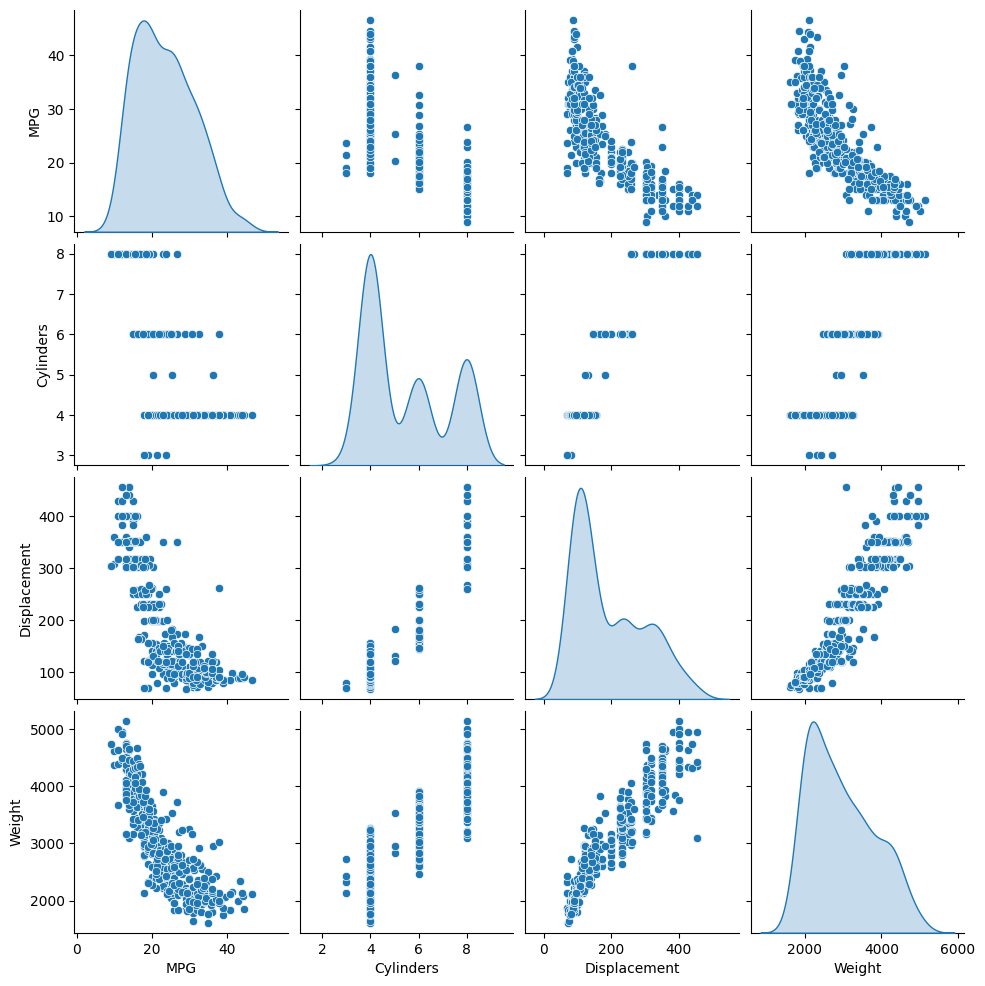

In [58]:
# Визуализируем данные при помощи библиотеки seaborn
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']],
             diag_kind='kde')
dataset.describe().transpose()


In [59]:
# Разделим на две выборки, 80% — обучающая
from sklearn.model_selection import train_test_split
# установим random_state, чтобы получать одинаковые
# результаты при отключении ноутбука
train_x, test_x = train_test_split(dataset, test_size=0.2,
random_state=2023)
train_y, test_y = train_x.pop("MPG"), test_x.pop("MPG")

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


In [62]:
normalizer = layers.Normalization()
normalizer.adapt(train_x)

base_model = tf.keras.Sequential([
 normalizer,
 layers.Dense(32, activation='relu'),
 layers.Dense(32, activation='relu'),
 layers.Dense(1),
])
# по умолчанию оптимизируемся стохастическим ГС
base_model.compile(loss="mean_squared_error")
base_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_46 (Dense)            (None, 32)                320       
                                                                 
 dense_47 (Dense)            (None, 32)                1056      
                                                                 
 dense_48 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1428 (5.58 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [63]:
%%time
base_model_history = base_model.fit(
  train_x, train_y,
  validation_data=(test_x, test_y),
  epochs=200)

Epoch 1/200
10/10 [==============================] - 2s 84ms/step - loss: 588.8271 - val_loss: 563.4075
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 556.8826 - val_loss: 534.5140
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 525.8364 - val_loss: 503.1387
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 491.9564 - val_loss: 468.3004
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 454.6645 - val_loss: 429.8493
Epoch 6/200
10/10 [==============================] - 0s 11ms/step - loss: 414.1146 - val_loss: 388.2042
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 370.7386 - val_loss: 344.4588
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 325.0905 - val_loss: 299.2770
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 278.9840 - val_loss: 254.4486
Epoch 10/200
10/10 [==============================] - 0s 8ms/step - 

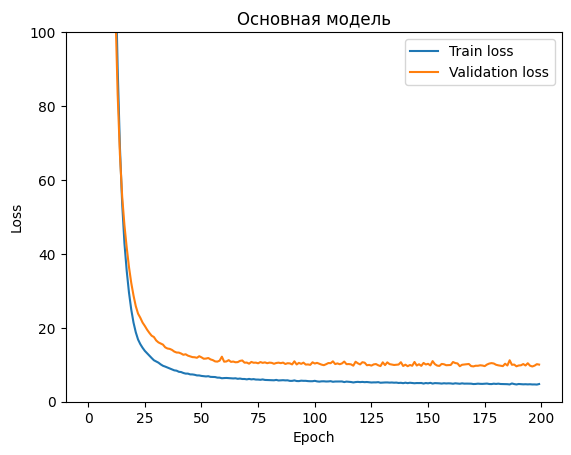

In [64]:
plot_history(base_model_history.history, "Основная модель", ylim=[0, 100])

Mean squared error: 10.045302391052246


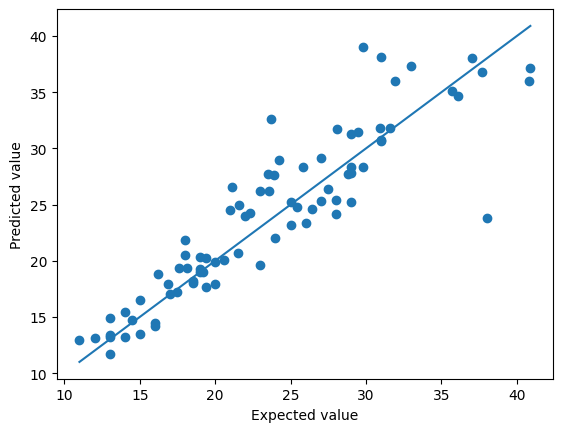

In [65]:
predicted_y = base_model.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", base_model_history.history["val_loss"][-1])

Теперь реализуем измененные модели

## Модель 1: Увеличение количества слоев

Добавим еще один слой с 64 нейронами, а также увеличим во втором слое до 64 вместо 32

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_49 (Dense)            (None, 64)                640       
                                                                 
 dense_50 (Dense)            (None, 64)                4160      
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6932 (27.08 KB)
Trainable params: 6913 (27.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________

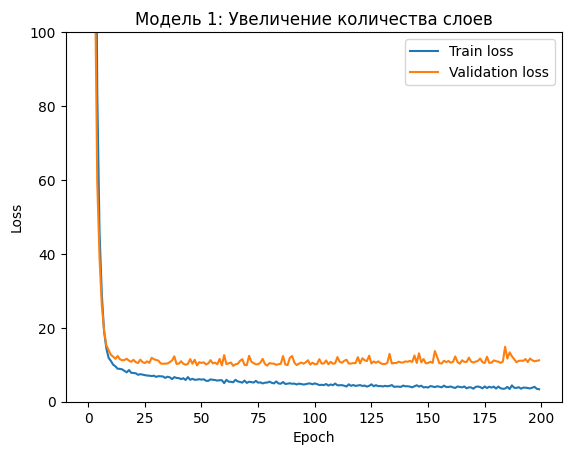

In [66]:
model_1 = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

model_1.compile(loss="mean_squared_error")
model_1.summary()

%time model_1_history = model_1.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
plot_history(model_1_history.history, "Модель 1: Увеличение количества слоев", ylim=[0, 100])


Mean squared error: 11.202190399169922


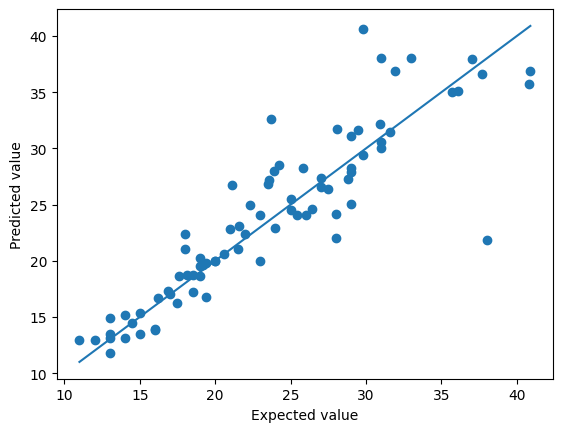

In [67]:
predicted_y = model_1.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", model_1_history.history["val_loss"][-1])

## Модель 2: Использование функции активации swish

заменим функцию активации на swish

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_53 (Dense)            (None, 32)                320       
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1428 (5.58 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 1s 31ms/step - loss: 600.3260 - 

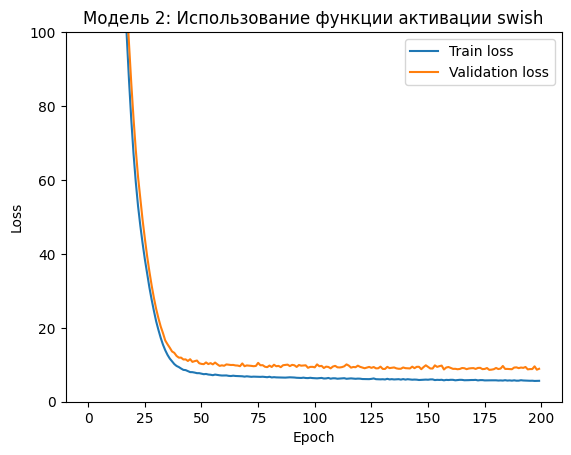

In [68]:
model_2 = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation='swish'),
    layers.Dense(32, activation='swish'),
    layers.Dense(1),
])

model_2.compile(loss="mean_squared_error")
model_2.summary()

%time model_2_history = model_2.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
plot_history(model_2_history.history, "Модель 2: Использование функции активации swish", ylim=[0, 100])


Mean squared error: 8.913678169250488


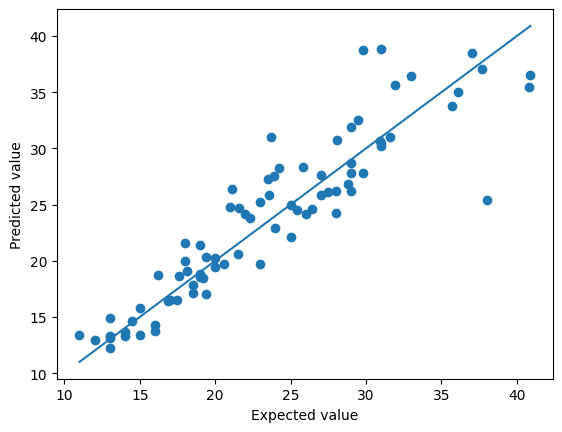

In [70]:
predicted_y = model_2.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", model_2_history.history["val_loss"][-1])

## Модель 3: Увеличение количества нейронов в слоях

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_56 (Dense)            (None, 128)               1280      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9620 (37.58 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 1s 19ms/step - loss: 543.9711 

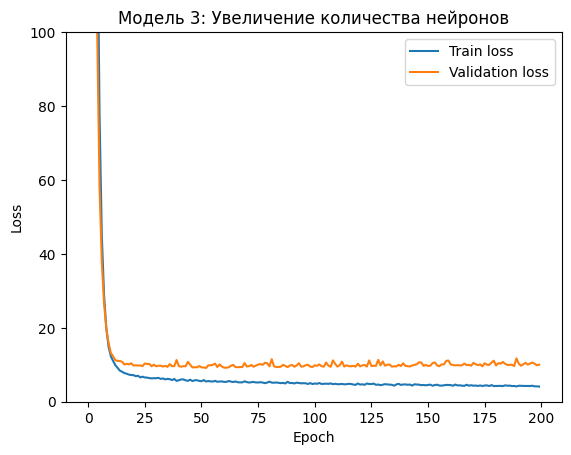

In [71]:
model_3 = tf.keras.Sequential([
    normalizer,
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

model_3.compile(loss="mean_squared_error")
model_3.summary()

%time model_3_history = model_3.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
plot_history(model_3_history.history, "Модель 3: Увеличение количества нейронов", ylim=[0, 100])


Mean squared error: 10.022354125976562


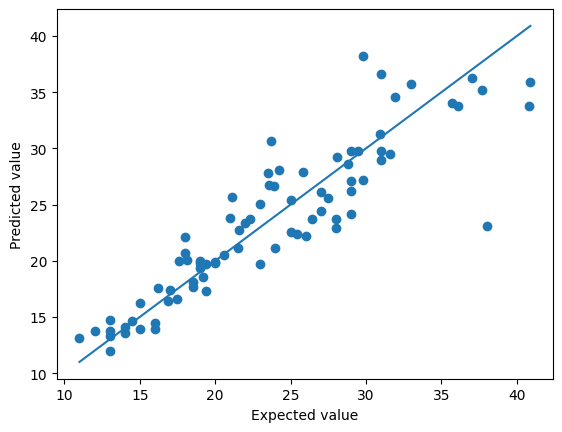

In [72]:
predicted_y = model_3.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", model_3_history.history["val_loss"][-1])

Результаты:
Mean squared error базовой модели 10.0453, время обучения 21,8 сек
Mean squared error первой модели 11.20219, время обучения 16,9 сек
Mean squared error второй модели 8.9136, время обучения 21.2 сек
Mean squared error третьей модели 10.0223, время обучения 20,9 сек

Вторая модель показывает лучший результат по сравнению с другими моделями, так как у нее наименьшее значение MSE.
Первая модель демонстрирует худший результат среди всех, так как у нее самое высокое значение MSE.
Время обучения различается несущественно между моделями и остается примерно на одном уровне.

# Задание 6

Постройте нейронную сеть для регрессии для набора данных цен на
 недвижимость в Бостоне. Сравните эффективность нейросетей с различными
параметрами.

In [73]:
data = pd.read_csv('/content/Boston.csv')
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [74]:
data = data.drop(columns=[data.columns[0]])

X = data.drop(columns=['medv'])
y = data['medv']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=14)


In [75]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [76]:
normalizer = layers.Normalization()
normalizer.adapt(train_x)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 13)                27        
 tion)                                                           
                                                                 
 dense_59 (Dense)            (None, 32)                448       
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                                 
 dense_61 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1564 (6.11 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 27 (112.00 Byte)
_________________________________________________________________
Epoch 1/200
13/13 [==============================] - 2s 23ms/step - loss: 592.4835 -

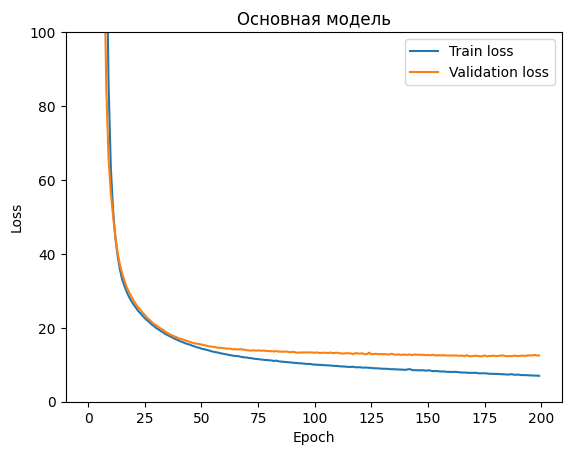

In [77]:
base_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

base_model.compile(loss="mean_squared_error", optimizer='adam')
base_model.summary()

%time base_model_history = base_model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)

plot_history(base_model_history.history, "Основная модель", ylim=[0, 100])


Mean squared error: 12.506962776184082


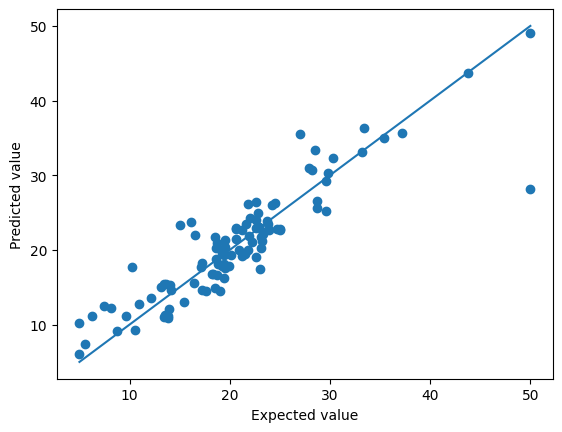

In [78]:
predicted_y = base_model.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", base_model_history.history["val_loss"][-1])

## 1 модель Увеличение количества слоев

Добавим еще один слой с 64 нейронами, а также увеличим во втором слое до 64 вместо 32

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 13)                27        
 tion)                                                           
                                                                 
 dense_62 (Dense)            (None, 64)                896       
                                                                 
 dense_63 (Dense)            (None, 64)                4160      
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dense_65 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7196 (28.11 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 27 (112.00 Byte)
________________

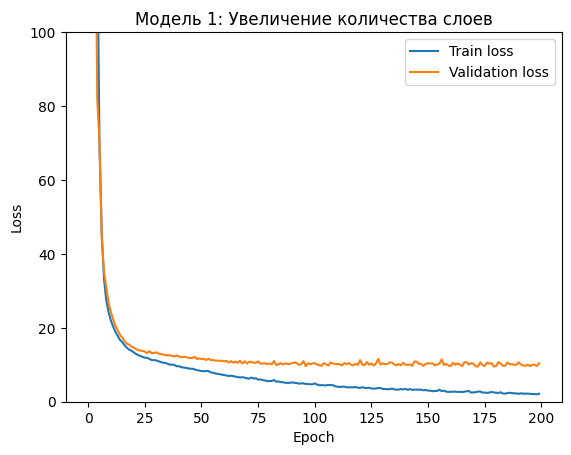

In [79]:
model_1 = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

model_1.compile(loss="mean_squared_error", optimizer='adam')
model_1.summary()

%time model_1_history = model_1.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
plot_history(model_1_history.history, "Модель 1: Увеличение количества слоев", ylim=[0, 100])


Mean squared error: 10.406400680541992


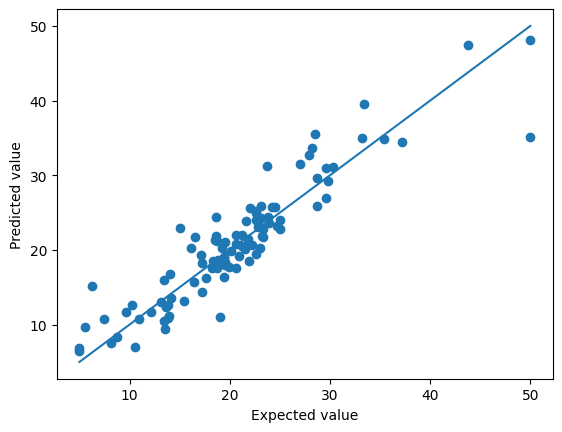

In [81]:
predicted_y = model_1.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", model_1_history.history["val_loss"][-1])

## 2 модель Использование функции активации swish

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 13)                27        
 tion)                                                           
                                                                 
 dense_72 (Dense)            (None, 32)                448       
                                                                 
 dense_73 (Dense)            (None, 32)                1056      
                                                                 
 dense_74 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1564 (6.11 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 27 (112.00 Byte)
_________________________________________________________________
Epoch 1/200
13/13 [==============================] - 1s 16ms/step - loss: 601.4156 -

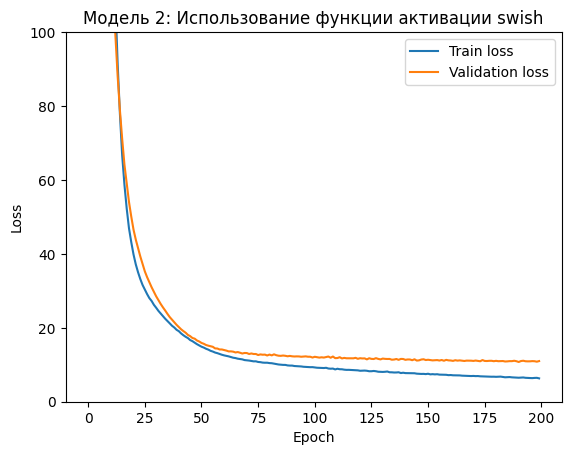

In [88]:
model_2 = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation='swish'),
    layers.Dense(32, activation='swish'),
    layers.Dense(1),
])

model_2.compile(loss="mean_squared_error", optimizer='adam')
model_2.summary()

%time model_2_history = model_2.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
plot_history(model_2_history.history, "Модель 2: Использование функции активации swish", ylim=[0, 100])


Mean squared error: 10.996146202087402


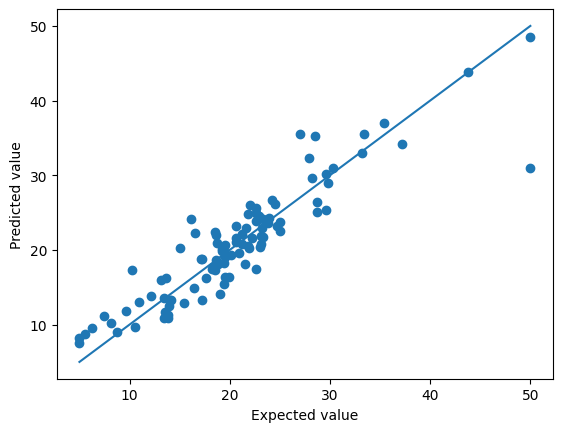

In [89]:
predicted_y = model_2.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", model_2_history.history["val_loss"][-1])

## 3 модель Увеличение количества нейронов в слоях

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 13)                27        
 tion)                                                           
                                                                 
 dense_69 (Dense)            (None, 128)               1792      
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dense_71 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10140 (39.61 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 27 (112.00 Byte)
_________________________________________________________________
Epoch 1/200
13/13 [==============================] - 1s 16ms/step - loss: 581.12

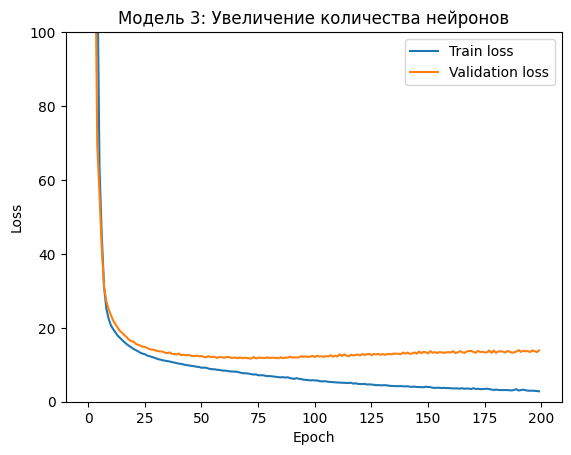

In [86]:
model_3 = tf.keras.Sequential([
    normalizer,
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

model_3.compile(loss="mean_squared_error", optimizer='adam')
model_3.summary()

%time model_3_history = model_3.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
plot_history(model_3_history.history, "Модель 3: Увеличение количества нейронов", ylim=[0, 100])


Mean squared error: 13.871325492858887


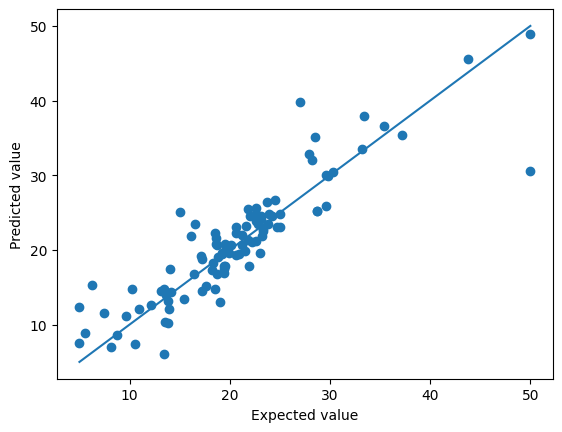

In [87]:
predicted_y = model_3.predict(test_x, verbose=0)
plt.scatter(test_y, predicted_y)
plt.xlabel("Expected value")
plt.ylabel("Predicted value")
lims = [min(*test_y, *predicted_y), max(*test_y, *predicted_y)]
plt.plot(lims, lims)
print("Mean squared error:", model_3_history.history["val_loss"][-1])

Результаты:

Mean squared error базовой модели 12.5069, время обучения 21,3 сек

Mean squared error первой модели 10.4064, время обучения 21.8 сек

Mean squared error второй модели 10.9961, время обучения 21.1 сек

Mean squared error третьей модели 13.8713, время обучения 17,7 сек

Лучшая модель с наименьшой квадратичной ошибкой это модель 2 с функцией активации swish, не смотря на то что е нее самое длительное время обучения различия во времени не значительны.